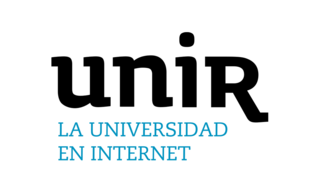

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype



El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

# Especifica la ruta de tu archivo .data
file_path = 'C:/Users/jesca/Desktop/ACTIVIDAD 2/covtype.data'

# Lee el archivo .data
df = pd.read_csv(file_path, delimiter=',', header=None)

df = df.drop(columns=[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
df = df.drop(columns=[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53])

df.columns = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
             "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points",
             "Wilderness_Area_1", "Wilderness_Area_2", "Wilderness_Area_3", "Wilderness_Area_4", "Cover_Type" ]
# Muestra las primeras filas del dataset
print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

¿Cuántas instancias de datos tiene el dataset?

In [10]:
df.shape

(581012, 15)

581012 instancias

¿Cuántas variables continuas hay en el dataset?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

Teniendo en cuenta lo que nos indicaba en la pagina desde donde descargabamos los datos teniamos que salvo mlas variables:

Wilderness_Area (binaria)
Soil_Type (binaria)
Cover_Type (variable clase)

, todas las demas eran continuas.

hay 45 variables categóricas, las relativas a Wilderness_Area, Soil_Type y target (Cover_Type).

In [14]:
# categorías
for col in df.columns:
    print(f"\033[1m{col}\033[0m: {df[col].nunique()}")


Elevation: 1978
Aspect: 361
Slope: 67
Horizontal_Distance_To_Hydrology: 551
Vertical_Distance_To_Hydrology: 700
Horizontal_Distance_To_Roadways: 5785
Hillshade_9am: 207
Hillshade_Noon: 185
Hillshade_3pm: 255
Horizontal_Distance_To_Fire_Points: 5827
Wilderness_Area_1: 2
Wilderness_Area_2: 2
Wilderness_Area_3: 2
Wilderness_Area_4: 2
Cover_Type: 7


In [ ]:
df.head()

¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

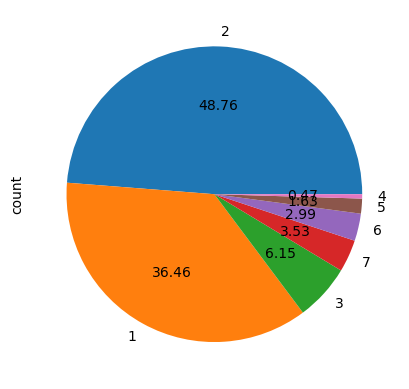

In [16]:
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

Un 48.76% de los casos pertenecen a la clase 2, y un 36.46% a la clase 1, y el resto están repartidas entre las clases restantes. Con esta distribución de clases podemos observar que el dataset no está balanceado y que será más fácil aprender de los tipos 1 y 2 que del resto, pero habrá que ver cómo se comporta.

¿Existen valores nulos o perdidos en el dataset?

In [18]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Cover_Type                            0
dtype: int64

No hay valors nulos.

Visualiza la matriz de correlaciones.

<Axes: >

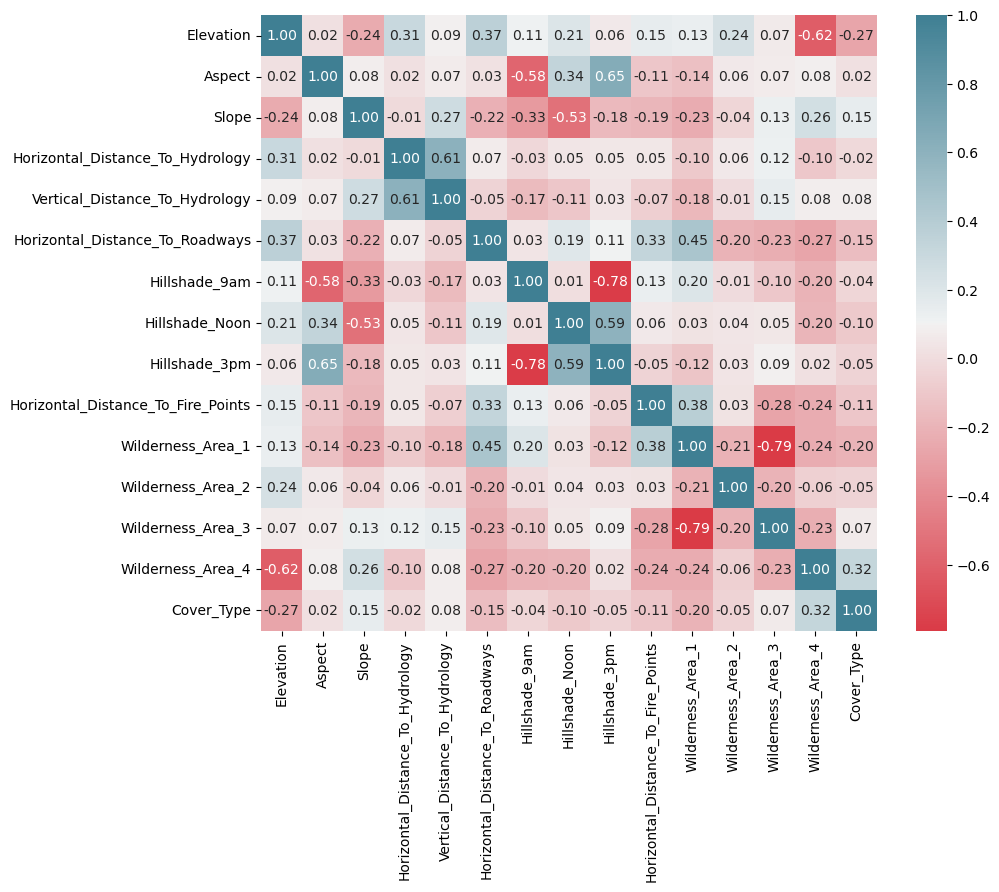

In [20]:
import seaborn as sns

correlation_matrix = df.corr(method="pearson")

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix,
    annot=True, 
    fmt=".2f",
    cmap=sns.diverging_palette(10, 220, as_cmap=True),
    square=True, 
    ax=ax)

¿Existe alguna variable altamente correlacionada con la variable de clase?

### IMPORTANTE ###

En un problema de clasificación no tiene sentido observar las correlaciones con la variable de clase, deberían darse cuenta de eso e indicarlo. Aun así, se les pide, y además deben indicar que no aporta nada a la selección de características ni del modelo, no hay ninguna variable corelacionada más de un 0.8 con la variable de clase.

**Con esta pista que se les daba debían indicar que no había ninguna correlacionada y que además no tiene sentido**

Para responder a esto, como es muy dificil ver la matriz de correlaciones, vamos a filtar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [221]:
corr_mat = df.corr()

corr_mat

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,-0.619374,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,0.055988,0.074904,0.082687,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,-0.036253,0.125663,0.255503,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,0.055726,0.122028,-0.100433,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,-0.008709,0.146839,0.077792,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.200411,-0.232933,-0.270349,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,0.201299,-0.006181,-0.100565,-0.200282,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,0.028728,0.042392,0.048646,-0.195733,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,-0.115155,0.034707,0.090757,0.018860,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,0.380568,0.027473,-0.277510,-0.236548,-0.108936


In [223]:
sorted_mat = corr_mat.unstack().sort_values()

In [225]:
sorted_mat.head(10)

Wilderness_Area_3  Wilderness_Area_1   -0.793593
Wilderness_Area_1  Wilderness_Area_3   -0.793593
Hillshade_3pm      Hillshade_9am       -0.780296
Hillshade_9am      Hillshade_3pm       -0.780296
Elevation          Wilderness_Area_4   -0.619374
Wilderness_Area_4  Elevation           -0.619374
Aspect             Hillshade_9am       -0.579273
Hillshade_9am      Aspect              -0.579273
Slope              Hillshade_Noon      -0.526911
Hillshade_Noon     Slope               -0.526911
dtype: float64

### HACER ANOVA ###

In [228]:
import scipy.stats as stats

Text(0.5, 1.0, 'Boxplot de X1 por Grupo')

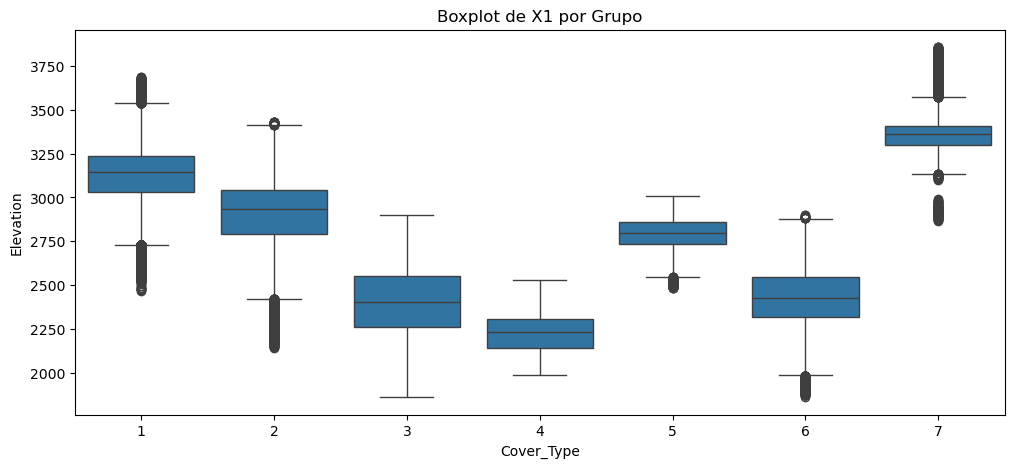

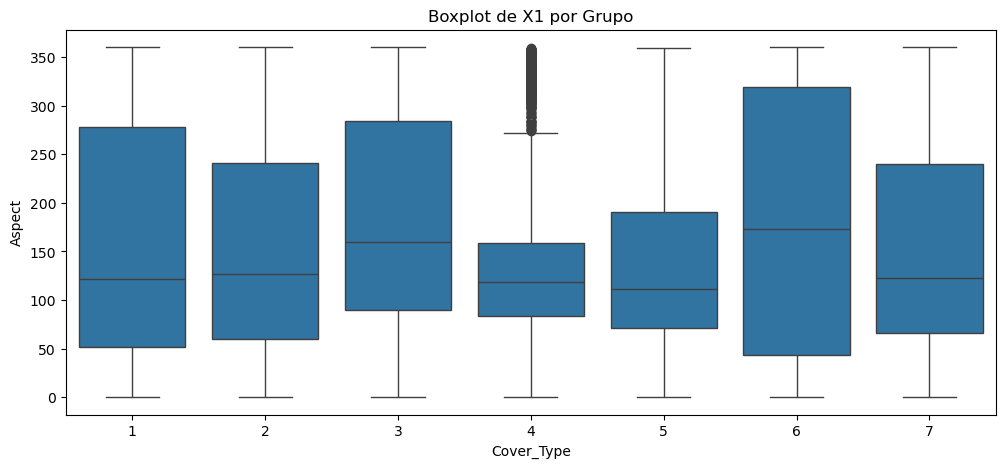

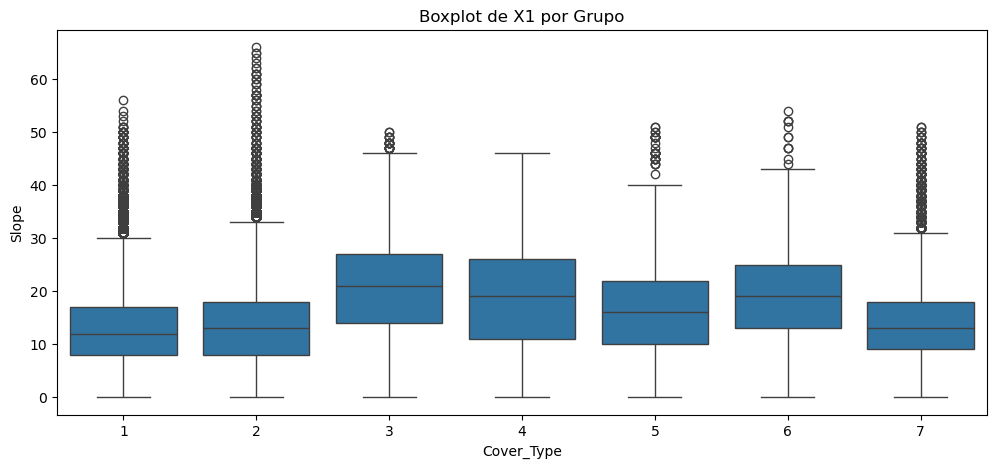

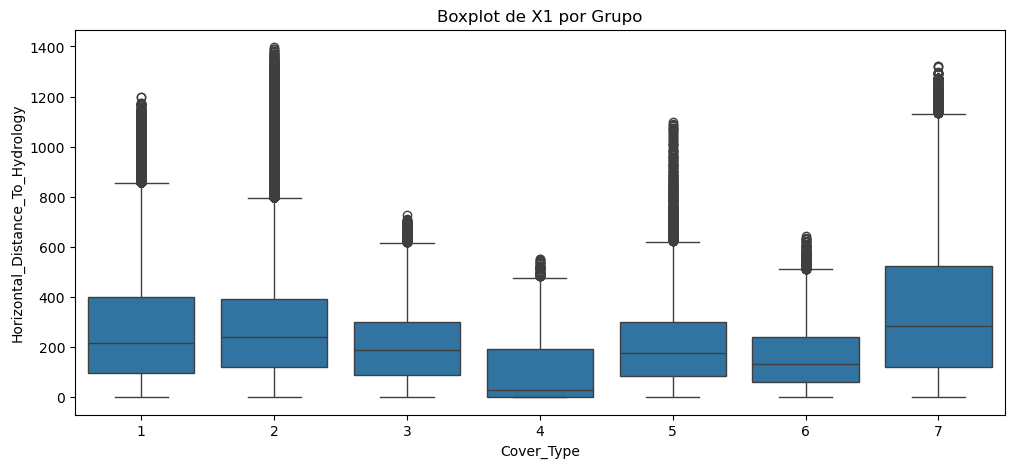

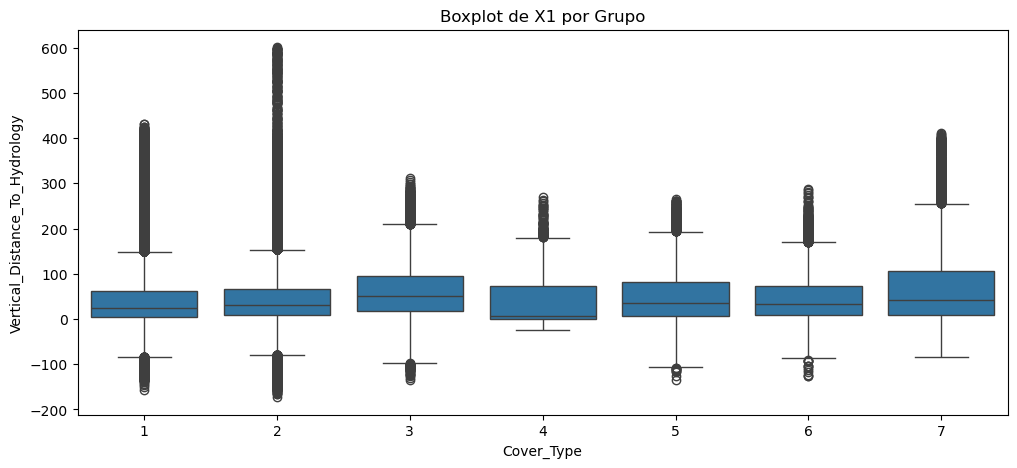

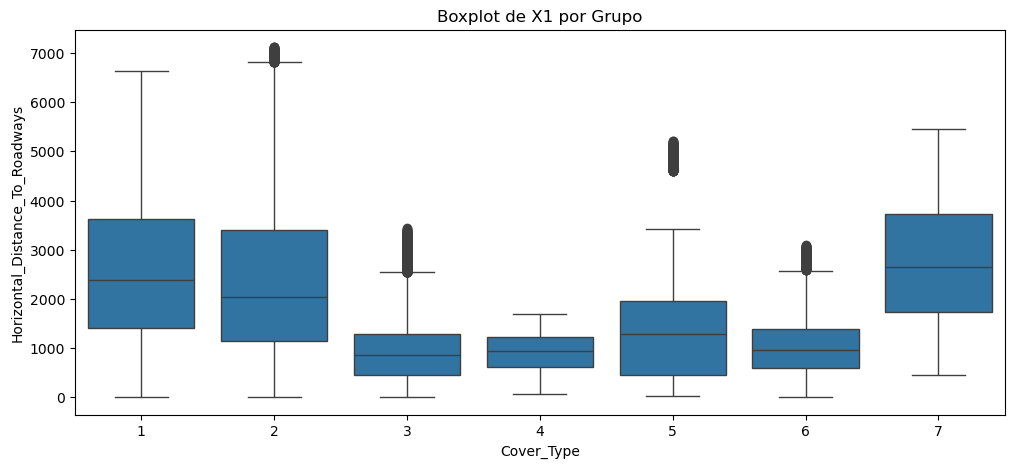

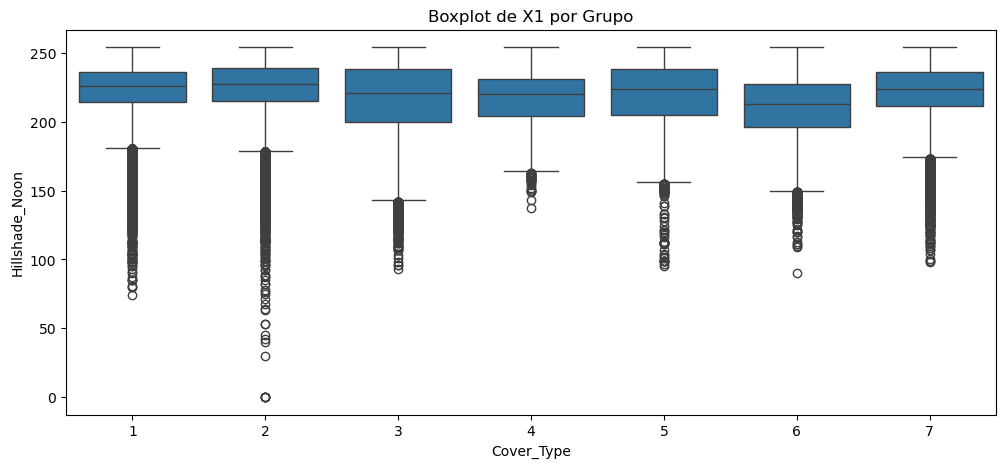

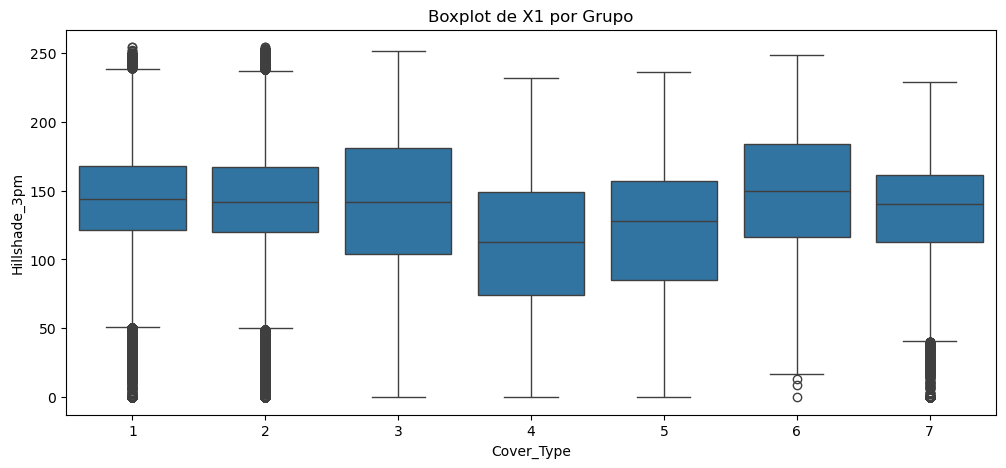

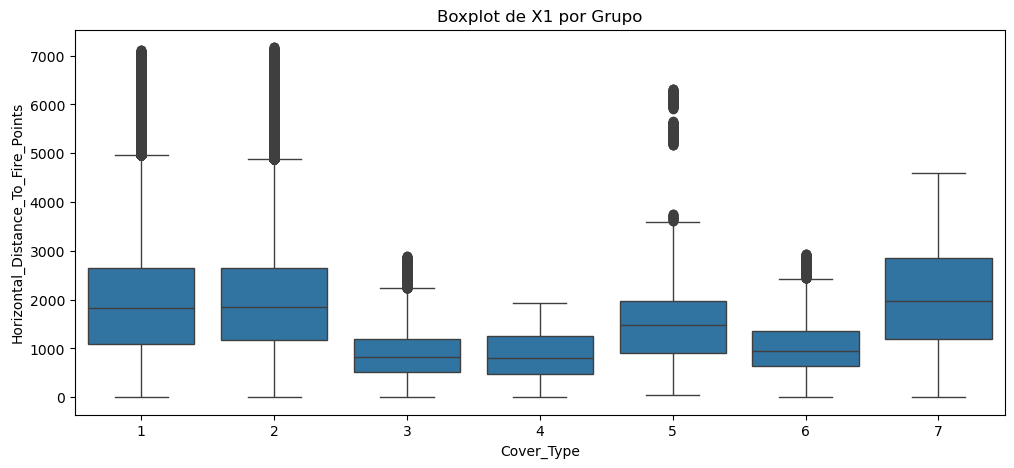

In [230]:
## anova_X1 = stats.f_oneway(df[df["Cover_Type"] == 1]["Elevation"],
##                           df[df["Cover_Type"] == 2]["Elevation"],
##                           df[df["Cover_Type"] == 3]["Elevation"],
##                           df[df["Cover_Type"] == 4]["Elevation"],
##                           df[df["Cover_Type"] == 5]["Elevation"],
##                           df[df["Cover_Type"] == 6]["Elevation"],
##                           df[df["Cover_Type"] == 7]["Elevation"])

## print("ANOVA para X1:")
## print(f"F-statistic: {anova_X1.statistic:.4f}, p-value: {anova_X1.pvalue:.4f}")



plt.figure(figsize=(12, 5))
sns.boxplot(x="Cover_Type", y="Elevation", data=df)
plt.title("Boxplot de X1 por Grupo")

plt.figure(figsize=(12, 5))
sns.boxplot(x="Cover_Type", y="Aspect", data=df)
plt.title("Boxplot de X1 por Grupo")

plt.figure(figsize=(12, 5))
sns.boxplot(x="Cover_Type", y="Slope", data=df)
plt.title("Boxplot de X1 por Grupo")

plt.figure(figsize=(12, 5))
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", data=df)
plt.title("Boxplot de X1 por Grupo")

plt.figure(figsize=(12, 5))
sns.boxplot(x="Cover_Type", y="Vertical_Distance_To_Hydrology", data=df)
plt.title("Boxplot de X1 por Grupo")

plt.figure(figsize=(12, 5))
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Roadways", data=df)
plt.title("Boxplot de X1 por Grupo")

plt.figure(figsize=(12, 5))
sns.boxplot(x="Cover_Type", y="Hillshade_Noon", data=df)
plt.title("Boxplot de X1 por Grupo")

plt.figure(figsize=(12, 5))
sns.boxplot(x="Cover_Type", y="Hillshade_3pm", data=df)
plt.title("Boxplot de X1 por Grupo")

plt.figure(figsize=(12, 5))
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Fire_Points", data=df)
plt.title("Boxplot de X1 por Grupo")

### HACER RANDOM FOREST PARA ELEGIR LAS MEJORES ###

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance


X = df[["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
             "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points",
             "Wilderness_Area_1", "Wilderness_Area_2", "Wilderness_Area_3", "Wilderness_Area_4"]]
y = df[ "Cover_Type" ]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# Obtener importancia de las características
importancia = modelo.feature_importances_

# Crear un DataFrame con la importancia
importancia_df = pd.DataFrame({"Variable": X.columns, "Importancia": importancia})
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)


Precisión del modelo: 0.9502


In [236]:
print("\nImportancia de las variables:")
print(importancia_df)


Importancia de las variables:
                              Variable  Importancia
0                            Elevation     0.318483
5      Horizontal_Distance_To_Roadways     0.141312
9   Horizontal_Distance_To_Fire_Points     0.132326
3     Horizontal_Distance_To_Hydrology     0.069418
4       Vertical_Distance_To_Hydrology     0.066019
1                               Aspect     0.050849
7                       Hillshade_Noon     0.044757
6                        Hillshade_9am     0.041761
8                        Hillshade_3pm     0.041229
2                                Slope     0.033836
13                   Wilderness_Area_4     0.031878
10                   Wilderness_Area_1     0.012374
12                   Wilderness_Area_3     0.009655
11                   Wilderness_Area_2     0.006104


¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

Atendiendo a nuestra prueba de random forest junto con los boxplot podemos decir que las mejores variables son para la clasificacion son:

- Elevation     
- Horizontal_Distance_To_Roadways     
- Horizontal_Distance_To_Fire_Points    

In [240]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X = X[["Elevation", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points"]]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

In [248]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame


# scaler = MinMaxScaler(feature_range=(0, 1))

# X_train = DataFrame(scaler.fit_transform(X_train))
# X_test = DataFrame(scaler.transform(X_test))


En RF no hace falta normalizar datos.

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [254]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier

n_arboles = {5, 10, 20, 50, 70}
particion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = None

randomForest_5 = RandomForestClassifier(n_estimators = 5, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None)
randomForest_5

randomForest_10 = RandomForestClassifier(n_estimators = 10, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None)
randomForest_10

randomForest_20 = RandomForestClassifier(n_estimators = 20, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None)
randomForest_20

randomForest_50 = RandomForestClassifier(n_estimators = 50, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None)
randomForest_50

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50)

In [256]:
score_5 = randomForest_5.fit(X_train,y_train).score(X_train, y_train)
score_10 = randomForest_10.fit(X_train,y_train).score(X_train, y_train)
score_20 = randomForest_20.fit(X_train,y_train).score(X_train, y_train)
score_50 = randomForest_50.fit(X_train,y_train).score(X_train, y_train)


score = [score_5, score_10, score_20, score_50]

In [258]:
score

[0.7440238893825205, 0.7467368316878545, 0.7484407573863673, 0.748150315505939]

Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

In [261]:
randomForest_20.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [263]:
from sklearn.metrics import classification_report

y_predicted = randomForest[4].predict(X_test)

In [265]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           1       0.74      0.74      0.74     42275
           2       0.76      0.82      0.79     56602
           3       0.68      0.70      0.69      7269
           4       0.82      0.13      0.23       546
           5       0.76      0.21      0.33      1929
           6       0.65      0.32      0.43      3496
           7       0.83      0.55      0.66      4086

    accuracy                           0.75    116203
   macro avg       0.75      0.50      0.55    116203
weighted avg       0.74      0.75      0.74    116203



In [267]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_predicted)
print(CM)

[[31120 10668     9     0    24     1   453]
 [ 9320 46525   526     0   102   112    17]
 [    0  1736  5099    16     0   418     0]
 [    0     0   418    73     0    55     0]
 [   17  1497     9     0   405     1     0]
 [    0   901  1490     0     0  1105     0]
 [ 1791    50     0     0     0     0  2245]]


¿Cuántos ejemplos ha clasificado correctamente?

**Deberían indicar que los clasificados correctamente son los de la diagonal principal. Este cálculo puede variar si han seleccionado alguna porción del dataset original y no han usado el dataset entero.**

correctos = 128587 + 196727 + 23989 + 1505+ 1640 + 5901 + 11946

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

En general podemos decir que las clases 5 y 6 son las que peor rendimiento tienen en la clasificación ya que comente más fallos en ellas. Las clases 2 y 3 son las que mejor clasisfica. La clase 7 la confunde con las clases 1 y 2 pero con ninguna otra.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [169]:
for i in range(len(randomForest)):
    print(randomForest[i])
    y_predicted = randomForest[i].predict(X_test)
    print(classification_report(y_test,y_predicted))

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50)
              precision    recall  f1-score   support

           1       0.74      0.74      0.74     42275
           2       0.76      0.82      0.79     56602
           3       0.67      0.71      0.69      7269
           4       0.89      0.14      0.24       546
           5       0.76      0.21      0.33      1929
           6       0.66      0.30      0.41      3496
           7       0.85      0.54      0.66      4086

    accuracy                           0.75    116203
   macro avg       0.76      0.49      0.55    116203
weighted avg       0.75      0.75      0.74    116203

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=20)
              precision    recall  f1-score   support

           1       0.74      0.73      0.74     42275
           2      

Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

In [22]:
RF = randomForest[len(randomForest)-1]
    
y_pred = RF.predict(X_test)

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


In [23]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.76      0.78    169271
           2       0.79      0.87      0.83    226689
           3       0.80      0.84      0.82     28681
           4       0.88      0.68      0.76      2218
           5       0.85      0.22      0.34      7626
           6       0.75      0.42      0.54     13924
           7       0.89      0.73      0.80     16401

    accuracy                           0.80    464810
   macro avg       0.82      0.64      0.70    464810
weighted avg       0.80      0.80      0.79    464810

[[128587  39259     13      0     38      7   1367]
 [ 27967 196727    956      5    224    737     73]
 [     7   3334  23989    147     31   1173      0]
 [     0      5    658   1505      0     50      0]
 [    99   5802     81      0   1640      4      0]
 [    15   3702   4239     62      5   5901      0]
 [  4352    103      0      0      0      0  11946]]


Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

**Support Vector Machine**

In [22]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [24]:
df.shape[0]

581012

In [26]:
conteo_clases = df['Cover_Type'].value_counts()
num_clases = len(conteo_clases)
print(f"Número de clases: {num_clases}")
print("\nDistribución de clases:\n", conteo_clases)

Número de clases: 7

Distribución de clases:
 Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [28]:
df_2 = df[df['Cover_Type'] == 2]  # Filtrar la clase específica
df_2 = df_2.sample(n=min(1400, len(df[df['Cover_Type'] == 2] )), random_state=42)  # Seleccionar filas

df_2.shape
print("\nDistribución después del balanceo:\n", df_2['Cover_Type'].value_counts())


Distribución después del balanceo:
 Cover_Type
2    1400
Name: count, dtype: int64


In [30]:
df_1 = df[df['Cover_Type'] == 1]  # Filtrar la clase específica
df_1 = df_1.sample(n=min(1400, len(df[df['Cover_Type'] == 1] )), random_state=42)  # Seleccionar filas

df_1.shape
print("\nDistribución después del balanceo:\n", df_1['Cover_Type'].value_counts())


Distribución después del balanceo:
 Cover_Type
1    1400
Name: count, dtype: int64


In [32]:
df_3 = df[df['Cover_Type'] == 3]  # Filtrar la clase específica
df_3 = df_3.sample(n=min(1400, len(df[df['Cover_Type'] == 3] )), random_state=42)  # Seleccionar filas

df_3.shape
print("\nDistribución después del balanceo:\n", df_3['Cover_Type'].value_counts())


Distribución después del balanceo:
 Cover_Type
3    1400
Name: count, dtype: int64


In [34]:
df_7 = df[df['Cover_Type'] == 7]  # Filtrar la clase específica
df_7 = df_7.sample(n=min(1400, len(df[df['Cover_Type'] == 7] )), random_state=42)  # Seleccionar filas

df_7.shape
print("\nDistribución después del balanceo:\n", df_7['Cover_Type'].value_counts())


Distribución después del balanceo:
 Cover_Type
7    1400
Name: count, dtype: int64


In [36]:
df_6 = df[df['Cover_Type'] == 6]  # Filtrar la clase específica
df_6 = df_6.sample(n=min(1400, len(df[df['Cover_Type'] == 6] )), random_state=42)  # Seleccionar filas

df_6.shape
df_7.shape
print("\nDistribución después del balanceo:\n", df_6['Cover_Type'].value_counts())


Distribución después del balanceo:
 Cover_Type
6    1400
Name: count, dtype: int64


In [48]:
df_5 = df[df['Cover_Type'] == 5]  # Filtrar la clase específica
df_5 = df_5.sample(n=min(1400, len(df[df['Cover_Type'] == 5] )), random_state=42)  # Seleccionar filas

df_5.shape
print("\nDistribución después del balanceo:\n", df_5['Cover_Type'].value_counts())


Distribución después del balanceo:
 Cover_Type
5    1400
Name: count, dtype: int64


In [50]:
df_4 = df[df['Cover_Type'] == 4]  # Filtrar la clase específica
df_4 = df_4.sample(n=min(1400, len(df[df['Cover_Type'] == 4] )), random_state=42)  # Seleccionar filas

df_4.shape
print("\nDistribución después del balanceo:\n", df_4['Cover_Type'].value_counts())


Distribución después del balanceo:
 Cover_Type
4    1400
Name: count, dtype: int64



Distribución después del balanceo:
 Cover_Type
1    1400
2    1400
3    1400
4    1400
5    1400
6    1400
7    1400
Name: count, dtype: int64


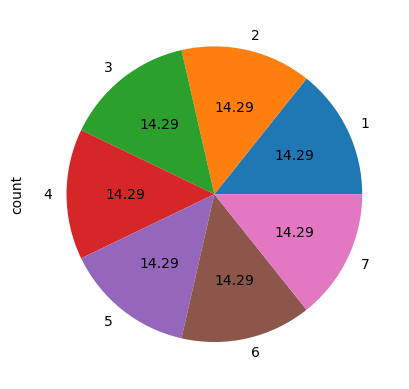

In [52]:
df_balanceado = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], ignore_index=True)

print("\nDistribución después del balanceo:\n", df_balanceado['Cover_Type'].value_counts())

df_balanceado['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

In [54]:
df_balanceado.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Cover_Type
0,2952,72,30,67,38,2614,238,169,41,2213,0,0,1,0,1
1,3134,321,6,90,0,750,204,234,169,1140,0,1,0,0,1
2,3292,59,19,175,7,4226,230,196,90,3588,0,0,1,0,1
3,2958,48,7,30,4,3114,223,225,138,1132,0,0,1,0,1
4,3258,187,8,470,56,2564,221,246,159,1374,0,0,1,0,1


In [58]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

**Sí, en SVM hay que normalizar datos. Podían utilizar el método de escalado preferido**

In [61]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


scaler = StandardScaler()

X_train = DataFrame(scaler.fit_transform(X_train))
X_test = DataFrame(scaler.transform(X_test))

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [63]:
from sklearn.svm import SVC

C = {0.1, 1, 10, 100, 1000}
kernel = 'rbf'
gamma = 'scale'

svc_01 = SVC(C=0.1, kernel=kernel, gamma=gamma) 
svc_1  = SVC(C=1, kernel=kernel, gamma=gamma) 
svc_10  = SVC(C=10, kernel=kernel, gamma=gamma) 
svc_100  = SVC(C=100, kernel=kernel, gamma=gamma) 
svc_1000  = SVC(C=1000, kernel=kernel, gamma=gamma) 

In [ ]:
score_01 = svc_01.fit(X_train,y_train).score(X_train, y_train)

Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

_indica aquí tu respuesta_

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [ ]:
## PON AQUÍ TU CÓDIGO

_indica aquí tu respuesta_

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.